# Tarefa Aula 8
## &nbsp;&nbsp;&nbsp;Jogando Dados
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Nome: Arthur Araujo Galdino dos Santos

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Disponível em: URL

In [112]:
# Including packages
using Random, Statistics, DataFrames, CairoMakie

In [77]:
"""
 roll() : Outputs Integer
 Roll a dice and outputs the rolled value; 
"""
function roll()
    output =  rand(1:6)
    return output
end

"""
⚀(::Integer) : Outputs Vector{Int}

Receives an integer number of times to throw both dices and returns the sum of sides for each roll.
"""
function ⚀(n::Integer) # \dicei
    out = Vector{Integer}()
    for i in 1:n
        X1 = roll()
        X2 = roll()
        push!(out, X1+X2)
    end

    return out
end

function med(Y::Vector{Integer})
    return sum(Y)/length(Y)
end

function desv(Y::Vector{Integer}, dof::Integer=0)
    mean_y = med(Y)
    desv = sqrt(sum((Y .- mean_y) .^ 2) * (1/(length(Y)-dof)))
    return desv
end
;

5.4
2.2705848487901865
2.2705848487901865


In [184]:
rolls = 1000

rolls_result = ⚀(rolls)
self_med = med(rolls_result)
jul_med = mean(rolls_result)
self_desv = desv(rolls_result)
self_desv_dof = desv(rolls_result, 1)
jul_desv = std(rolls_result)

println("Calculated Mean: $self_med \nJulia Mean: $jul_med \nCalculated STD (NO DOF CORRECTION): $self_desv \nCalculated STD (N-1 DOF): $self_desv_dof \nJulia STD: $jul_desv")

diffMed = (self_med - jul_med) /jul_med
diffSTDNoDOF = (self_desv - jul_desv)*100 / jul_desv
diffSTDDOF = (self_desv_dof - jul_desv)*100 / jul_desv

println("\n% Diff:\nMean: $diffMed\nSTD W/O DOF: $diffSTDNoDOF\nSTD W/ DOF: $diffSTDDOF")

Calculated Mean: 6.908 
Julia Mean: 6.908 
Calculated STD (NO DOF CORRECTION): 2.426836624084942 
Calculated STD (N-1 DOF): 2.428050953219769 
Julia STD: 2.4280509532197643

% Diff:
Mean: 0.0
STD W/O DOF: -0.05001250625370226
STD W/ DOF: 2.0118940674918145e-13


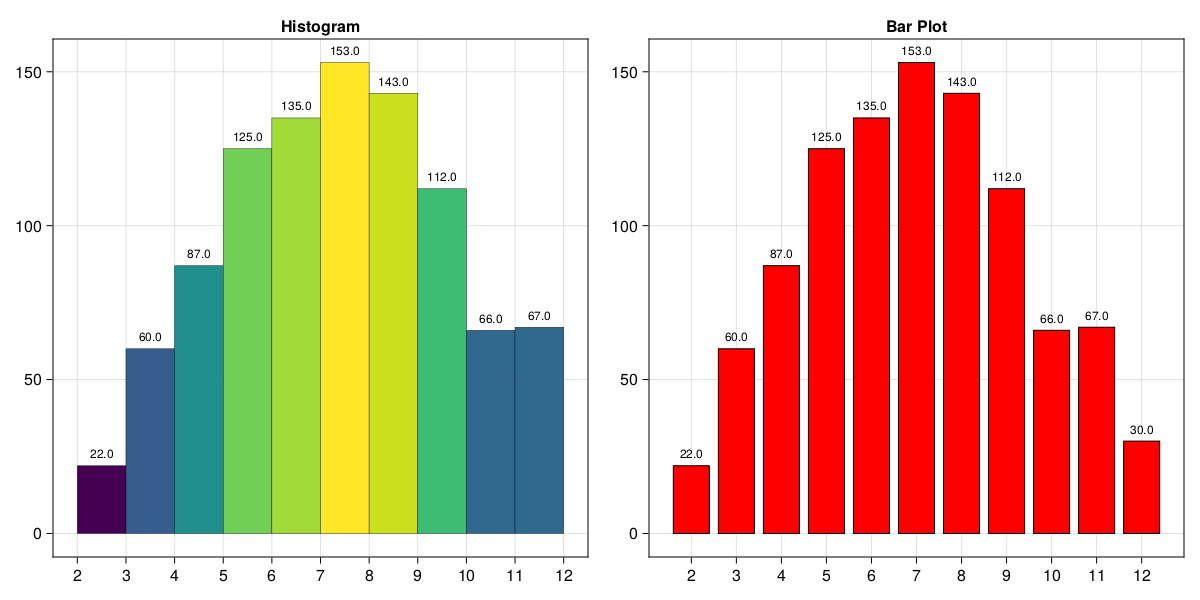

In [178]:
fig = Figure(resolution=(1200,600))

hist(fig[1,1], rolls_result, bins=2:12, bar_labels = :values, label_size = 12, strokewidth = 0.5, strokecolor = (:black, 0.8), color = :values, axis = (xticks = (2:12), title = "Histogram"))
Axis(fig[1,2], title="Bar Plot", xticks=(2:12))
barplot!(2:12, sums, color = :red, strokecolor = :black, strokewidth = 1, bar_labels= :y, label_size = 12)
save("figure.png", fig)
fig

#### POC of `roll()` function

In [46]:
dictRet = Dict{Integer, Integer}()

for i ∈ 1:100000
    ret = roll()
    if !haskey(dictRet, ret)
        dictRet[ret] = 1
    else
        dictRet[ret] += 1
    end
end

println(dictRet)

dictPercent = Dict{Integer,Float64}([])
for (k,v) ∈ dictRet
    dictPercent[k] = dictRet[k]*0.001
end

println(dictPercent)

;

Dict{Integer, Integer}(5 => 16829, 4 => 16875, 6 => 16526, 2 => 16593, 3 => 16714, 1 => 16463)
Dict{Integer, Float64}(5 => 16.829, 4 => 16.875, 6 => 16.526, 2 => 16.593, 3 => 16.714, 1 => 16.463)
